<a href="https://colab.research.google.com/github/MRdvan/GoogleColabMachineLearning/blob/master/iris_classification_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#from google.colab import files
#uploaded = files.upload()

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("/content/Iris.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [11]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [12]:
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

# Splitting data to train and test

In [13]:
from sklearn.model_selection import train_test_split
df.drop(labels="Id",axis=1,inplace=True)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(X.shape, y.shape)

(150, 4) (150,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train = pd.concat([X_train,y_train],axis = 1)
test = pd.concat([X_test,y_test],axis = 1)

# Outlier detection on Train set

Text(0.5, 1.0, 'Boxplot of SepalLengthCm ')

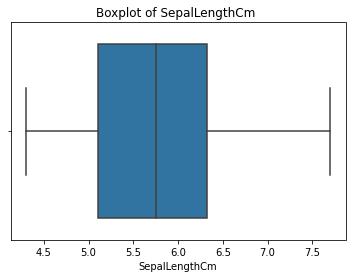

In [15]:
sns.boxplot(data=train,x=train["SepalLengthCm"])
plt.title("Boxplot of SepalLengthCm ")


Text(0.5, 1.0, 'Boxplot of SepalWidthCm ')

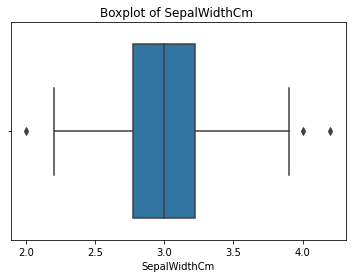

In [16]:
sns.boxplot(data=train,x=train["SepalWidthCm"])
plt.title("Boxplot of SepalWidthCm ")

Text(0.5, 1.0, 'Boxplot of PetalLengthCm')

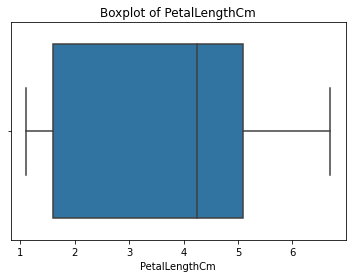

In [17]:
sns.boxplot(data=train,x=train["PetalLengthCm"])
plt.title("Boxplot of PetalLengthCm")

Text(0.5, 1.0, 'Boxplot of PetalWidthCm')

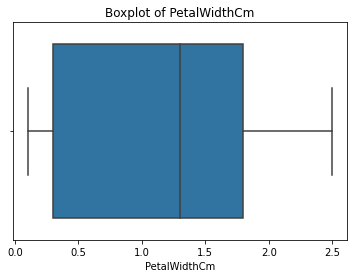

In [18]:
sns.boxplot(data=train,x=train["PetalWidthCm"])
plt.title("Boxplot of PetalWidthCm")

# Outlier Handling


In [19]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [20]:
lower_bound,upper_bound = outlier_treatment(train.SepalWidthCm)

In [21]:
print(train.shape)

(100, 5)


In [22]:
train[(train.SepalWidthCm < lower_bound) | (train.SepalWidthCm > upper_bound)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
60,5.0,2.0,3.5,1.0,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa


In [23]:
train.drop(train[ (train.SepalWidthCm > upper_bound) | (train.SepalWidthCm < lower_bound) ].index , inplace=True)

In [24]:
train[(train.SepalWidthCm < lower_bound) | (train.SepalWidthCm > upper_bound)]


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [25]:
print(train.shape)

(97, 5)


Text(0.5, 1.0, 'Boxplot of SepalWidthCm ')

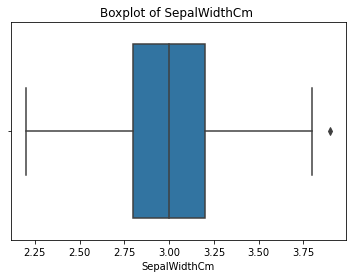

In [26]:
sns.boxplot(data=train,x=train["SepalWidthCm"])
plt.title("Boxplot of SepalWidthCm ")

In [27]:
train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
96,5.7,2.9,4.2,1.3,Iris-versicolor
105,7.6,3.0,6.6,2.1,Iris-virginica
66,5.6,3.0,4.5,1.5,Iris-versicolor
0,5.1,3.5,1.4,0.2,Iris-setosa
122,7.7,2.8,6.7,2.0,Iris-virginica


# One hot Enconding to target

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
train_test = pd.concat([train,test],axis = 0)
le = LabelEncoder()
train_test.Species = le.fit_transform(train_test.Species)
train_test.Species.head()

96     1
105    2
66     1
0      0
122    2
Name: Species, dtype: int64

In [30]:
X = train_test.iloc[:, :-1]
y = train_test.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train = pd.concat([X_train,y_train],axis = 1)
test = pd.concat([X_test,y_test],axis = 1)

# Drawing heatmap to detect correlation between features and target

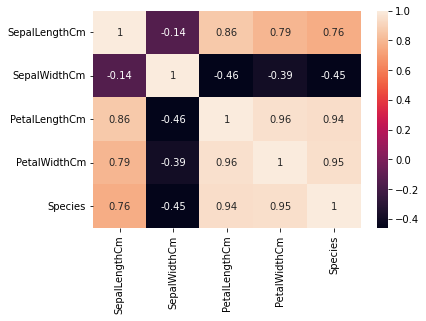

In [31]:
# generating 2-D 10x10 matrix of random numbers
# from 1 to 100
data = np.random.randint(low=1,
                         high=100,
                         size=(10, 10))
# setting the parameter values
annot = True
# plotting the heatmap
hm = sns.heatmap(data=train.corr(),
                annot=annot)
# displaying the plotted heatmap
plt.show()

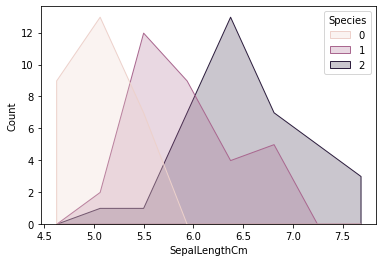

In [32]:
sns.histplot(train, x="SepalLengthCm", hue="Species", element="poly")

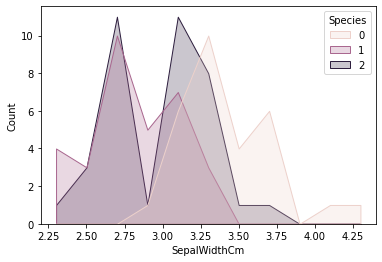

In [33]:
sns.histplot(train, x="SepalWidthCm", hue="Species", element="poly")

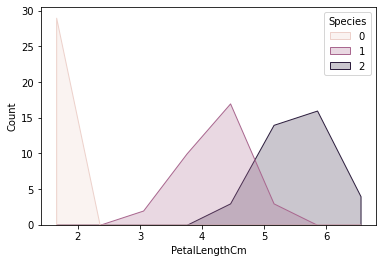

In [34]:
sns.histplot(train, x="PetalLengthCm", hue="Species", element="poly")

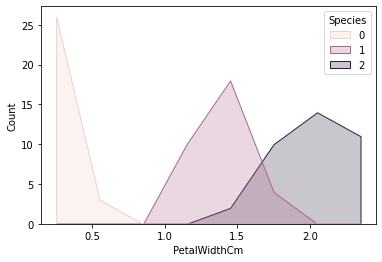

In [35]:
sns.histplot(train, x="PetalWidthCm", hue="Species", element="poly")

# Normalization

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(98, 4) (98,) (49, 4) (49,)


# Modelling (LogisticRegression)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

lr = LogisticRegression(random_state=42)
parameters = {"C":np.logspace(-3,3,7), "penalty":["l1","l2","elasticnet"]}

In [39]:
gs = GridSearchCV(lr, parameters,n_jobs=-1,scoring="accuracy",cv=5)

In [40]:
gs.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 105.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [41]:
gs.best_score_

0.9794736842105263

In [42]:
gs.best_params_

{'C': 100.0, 'penalty': 'l2'}

In [43]:
y_test_predict = gs.predict(X_test)
accuracy_score(y_test, y_test_predict)

0.9591836734693877

In [44]:
roc_auc_score(y_test, gs.predict_proba(X_test), multi_class='ovr')

0.9973500083794201

# Modelling with other classification algorithms

In [45]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
clf = {
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Support Vector": SVC(),
          "Decision trww": DecisionTreeClassifier()
          }

np.random.seed(42)
model_scores = {}
for name, model in clf.items():
    # Fit the model to the data
    model.fit(X_train, y_train)
    # Evaluate the model and append its score to model_scores
    model_scores[name] = model.score(X_test, y_test)


In [51]:
model_scores

{'Decision trww': 0.9387755102040817,
 'KNN': 0.9387755102040817,
 'Random Forest': 0.9795918367346939,
 'Support Vector': 0.9795918367346939}

# Looks like SVC and RandomForest models are giving the best scores